In [1]:
# 1- Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
# 2- Load the data
data_df = pd.read_csv('weight_height.csv')
data = data_df['Height'].values

Text(0.5, 1.0, 'Histogram of Height')

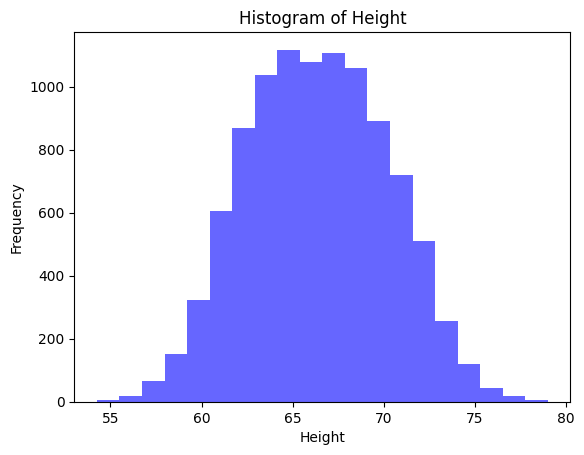

In [7]:
# 3- Visualize the data
plt.hist(data, bins = 20, alpha = 0.6, color ='b')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Height')

In [8]:
# 4- Choose a distribution (here it looks normal)
chosen_distribution = stats.norm

In [9]:
# 5- Fit the chosen distribution
params = chosen_distribution.fit(data)

In [10]:
# 6- Generate random sample
samples = chosen_distribution.rvs(size = len(data), *params)

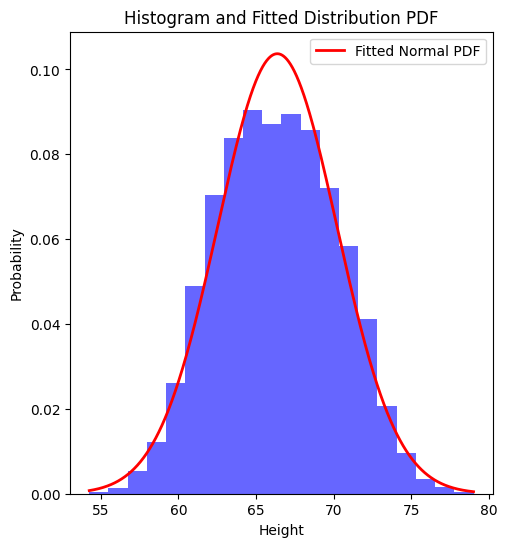

In [11]:
# 7- Visualize the fitted distribution
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(data, bins=20, density=True, alpha=0.6, color='b')
x = np.linspace(min(data), max(data), 1000)
pdf = chosen_distribution.pdf(x, *params)
plt.plot(x, pdf, 'r-', linewidth=2, label='Fitted Normal PDF')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.title('Histogram and Fitted Distribution PDF')
plt.legend()

In [13]:
# 8- Assess Goodness of Fit
ks_statistics, ks_p_value = stats.kstest(data, chosen_distribution.cdf, args = params)

print(f"KS Statistics: {ks_statistics}")
print(f"P-Value (KS Test): {ks_p_value}")

alpha = 0.01 #significance

if ks_p_value < alpha:
    print("The data significancy differs from the fitted distribution (KS Test)")
else:
    print("The data fits the fitted distribution (KS Test)")

KS Statistics: 0.025554169380077152
P-Value (KS Test): 4.177450898540336e-06
The data significancy differs from the fitted distribution (KS Test)


In [14]:
# 9- Interpret and Refine if needed
# According to data visualization and KS, normal distribution isn't good. We will repeat steps 4->9
# We will try Beta distribution
params

(66.367559754866, 3.847335739579883)

In [15]:
# 4-Choose distribution - Beta
chosen_distribution = stats.beta 

In [16]:
# 5- Fit distribution
params = chosen_distribution.fit(data)

In [17]:
# 6- Generate random sample
samples = chosen_distribution.rvs(size = len(data), *params)

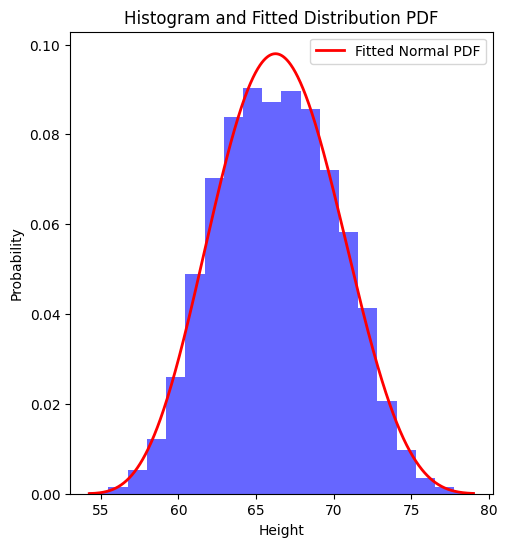

In [18]:
# 7- Visualize
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(data, bins=20, density=True, alpha=0.6, color='b')
x = np.linspace(min(data), max(data), 1000)
pdf = chosen_distribution.pdf(x, *params)
plt.plot(x, pdf, 'r-', linewidth=2, label='Fitted Normal PDF')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.title('Histogram and Fitted Distribution PDF')
plt.legend()

In [19]:
# 8- Assess goodness of fit
ks_statistics, ks_p_value = stats.kstest(data, chosen_distribution.cdf, args = params)

print(f"KS Statistics: {ks_statistics}")
print(f"P-Value (KS Test): {ks_p_value}")

alpha = 0.01 #significance

if ks_p_value < alpha:
    print("The data significancy differs from the fitted distribution (KS Test)")
else:
    print("The data fits the fitted distribution (KS Test)")

KS Statistics: 0.01385838529133615
P-Value (KS Test): 0.042541413488256796
The data fits the fitted distribution (KS Test)


In [20]:
# 9- Interpret
params

(5.958303879960818, 6.498121983925326, 52.87268602500352, 28.213515072819604)